## **Importing Libraries**

In [392]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

---
## **Exercise 1**
### 1.1. Function to test if a graph is regular

In [393]:
def test_regular(G: nx.Graph | nx.DiGraph) -> bool:
    degrees = [d for n, d in G.degree()]
    return len(set(degrees)) == 1

### 2.2. Testing the function

In [394]:
G = nx.Graph([(1, 2), (2, 3), (3, 1)])
print(f"The graph is{' not' if not test_regular(G) else ''} regular")

The graph is regular


---
## **Exercise 2**

### 2.1. Constructing the requested graph

In [395]:
G = nx.DiGraph([
    ('a', 'b'),
    ('b', 'a'),
    ('b', 'c'),
    ('c', 'b'),
    ('a', 'c')
])

### 2.2. Graph path operations
#### 2.2.1. Getting the adjacency matrix of the constructed graph

In [396]:
M = nx.to_numpy_array(G)

#### 2.2.2. Matrix power

In [397]:
print(f"M^2 = \n{np.linalg.matrix_power(M, 2)}\n")
print(f"M^3 = \n{np.linalg.matrix_power(M, 3)}\n")
print(f"M^4 = \n{np.linalg.matrix_power(M, 4)}\n")
print(f"M + M^2 + M^3 + M^4 = \n{M + np.linalg.matrix_power(M, 2) + np.linalg.matrix_power(M, 3) + np.linalg.matrix_power(M, 4)}\n")

M^2 = 
[[1. 1. 1.]
 [0. 2. 1.]
 [1. 0. 1.]]

M^3 = 
[[1. 2. 2.]
 [2. 1. 2.]
 [0. 2. 1.]]

M^4 = 
[[2. 3. 3.]
 [1. 4. 3.]
 [2. 1. 2.]]

M + M^2 + M^3 + M^4 = 
[[4. 7. 7.]
 [4. 7. 7.]
 [3. 4. 4.]]



#### 2.2.3. Getting how many paths of length 4 from a to b

In [398]:
print(f"There is {int(np.linalg.matrix_power(M, 4)[0, 1])} paths of length 4 to go from a to b\n")

There is 3 paths of length 4 to go from a to b



#### 2.2.4. Extracting the paths of length 4 from a to b

##### 2.2.4.1. Making a recursive function that returns paths (and path count) of certain length going from a node to another

In [399]:
def extract_paths(G: nx.Graph | nx.DiGraph, start_endpoint: any, end_endpoint: any, path_count: int) -> tuple[list[list], int]:
    if len(list(G[start_endpoint])) == 0 or len(list(G.predecessors(end_endpoint))) == 0 or path_count == 0:
        return ([], 0)
    
    if path_count == 1:
        if end_endpoint in list(G[start_endpoint]):
            return ([[start_endpoint, end_endpoint]], 1)
        else:
            return ([], 0)
        
    paths = []
    
    for node in list(G[start_endpoint]):
        temp_paths, _ = extract_paths(G, node, end_endpoint, path_count - 1)
        for path in temp_paths:
            paths.append([start_endpoint] + path)

    return (paths, len(paths))

##### 2.2.4.2. Applying `extract_paths` to extract paths of length 4 going from a to b

In [400]:
paths, path_count = extract_paths(G, 'a', 'b', 4)
print(f"There are {path_count} paths, and they are:")

for path in paths:
    print(" -> ".join(path))

There are 3 paths, and they are:
a -> b -> a -> c -> b
a -> c -> b -> a -> b
a -> c -> b -> c -> b


##### 2.2.4.3. Extracting paths of length 4 from b to b

In [401]:
paths, path_count = extract_paths(G, 'b', 'b', 4)
print(f"There are {path_count} paths, and they are:")

for path in paths:
    print(" -> ".join(path))

There are 4 paths, and they are:
b -> a -> b -> a -> b
b -> a -> b -> c -> b
b -> c -> b -> a -> b
b -> c -> b -> c -> b


##### 2.2.4.4. Extracting paths of length <= 4 from a to c

In [402]:
paths = []

for i in range(1, 5):
    temp_paths, _ = extract_paths(G, 'a', 'c', i)
    paths += temp_paths
    
path_count = len(paths)

print(f"There are {path_count} paths of length <= 4 from 'a' to 'c', they are:")

for path in paths:
    print(" -> ".join(path))

There are 7 paths of length <= 4 from 'a' to 'c', they are:
a -> c
a -> b -> c
a -> b -> a -> c
a -> c -> b -> c
a -> b -> a -> b -> c
a -> b -> c -> b -> c
a -> c -> b -> a -> c


---
## **Exercise 3**
### 3.1. Implementing `transitive_closure_matrix` function
`transitive_closure_matrix` follows Marshall's algorithm to get the transitive closure from an adjacency matrix associated to a directed graph.

In [403]:
def transitive_closure_matrix(M: np.ndarray) -> np.ndarray:
    if M.ndim != 2 and M.shape[0] != M.shape[1]:
        raise ValueError(f"Provided matrix is not a valid adjacency matrix")
    
    new_M = M.astype(bool, copy=True)
    length = new_M.shape[0]
    
    for i in range(length):
        for j in range(length):
            for k in range(length):
                new_M[i, j] = new_M[i, j] | (new_M[i, k] & new_M[k, j])

    return new_M

### 3.2. Implementing the requested graph, and getting its transitive closure associated matrix, then its graph

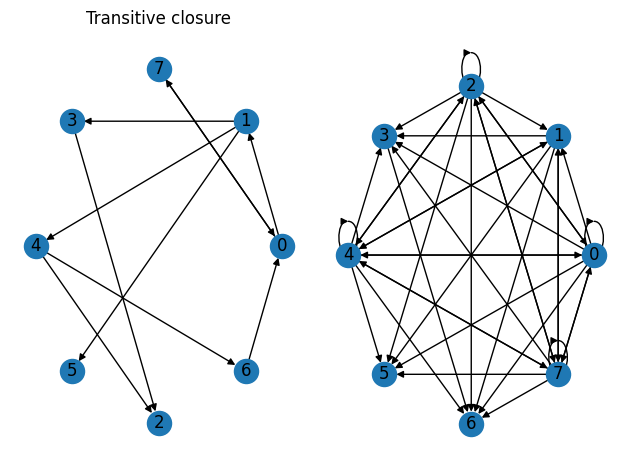

In [404]:
G = nx.DiGraph([
    (0, 1),
    (0, 7),
    (1, 3),
    (1, 4),
    (1, 5),
    (3, 2),
    (4, 2),
    (4, 6),
    (6, 0),
    (7, 0)
])

M = nx.to_numpy_array(G)
transitive_M = transitive_closure_matrix(M)
G1 = nx.DiGraph(transitive_M)

fig, (ax1, ax2) = plt.subplots(1, 2)

nx.draw(G, with_labels=True, ax=ax1, pos=nx.circular_layout(G))
ax1.set_title("Original graph")

nx.draw(G1, with_labels=True, ax=ax2, pos=nx.circular_layout(G1))
ax1.set_title("Transitive closure")

plt.tight_layout()
plt.show()

---

## **Exercise 4**
### 4.1. Implementing `row_sum_matrix`
`row_sum_matrix` is a function that returns a vector containing the sum of each row of a given matrix

In [405]:
def row_sum_matrix(M: list[list[int | float]] | np.ndarray) -> list[int | float]:
    if isinstance(M, np.ndarray):
        if M.ndim != 2:
            raise ValueError("M is not a 2D matrix")
        return M.sum(axis=1).tolist()
    
    return [sum(row) for row in M]

#### 4.1.1. Testing `row_sum_matrix`

In [406]:
M = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

row_sum_matrix(M)

[6, 15, 24]

In [407]:
M = np.array([[1, 7, 4],
              [6, 12, 7],
              [8, 2, 3]])

row_sum_matrix(M)

[12, 25, 13]

### 4.2. Implementing `in_degree`
`in_degree` is a function that returns the in-degree of each vertex of a matrix M

In [408]:
def in_degree(M: np.ndarray) -> list:
    if M.ndim != 2:
        raise ValueError("M is not a 2D matrix")
    return M.sum(axis=0).tolist()

#### 4.2.1. Testing `in_degree`

In [409]:
M = np.array([[2, 5, 8],
              [9, 4, 3],
              [5, 1, 7]])

in_degree(M)

[16, 10, 18]

---
## **Exercise 5**
### 5.1. Implementing `test_circuits_absence` function using adjacency matrix

In [410]:
def test_circuits_absence(M: np.ndarray) -> bool:
    transitive_M = transitive_closure_matrix(M)
    length = transitive_M.shape[0]
    return (sum([transitive_M[i, i] for i in range(length)]) == 0).__bool__()

#### 5.1.1. Test `test_circuits_absence` function
The provided adjacency matrix has only one arc which means `test_circuits_absence` should return True here, because there are no circuits.

In [411]:
test_circuits_absence(np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 0, 0]
]))

True

Here, the adjacency matrix has 2 arcs, 1 -> 2 and 2 -> 1. This is a valid circuit and `test_circuits_absence` should return False, because there is a circuit.

In [412]:
test_circuits_absence(np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0]
]))

False

---
## Exercise 6
### 6.1. Implementing `extract_circuits` function

In [413]:
def extract_circuits(G: nx.DiGraph) -> tuple[list[list], int]:
    M = nx.to_numpy_array(G)
    
    if test_circuits_absence(M):
        return [], 0
    
    transitive_M = transitive_closure_matrix(M)
    diagonal = [transitive_M[i, i] for i in range(transitive_M.shape[0])]
    
    nodes = list(G.nodes)
    max_circuit_length = G.size()
    
    circuits = []
    for i in range(len(diagonal)):
        if diagonal[i] == 1:
            for path_count in range(1, max_circuit_length + 1):
                temp_circuits, _ = extract_paths(G, nodes[i], nodes[i], path_count)
                circuits += temp_circuits
            
    return (circuits, len(circuits))

### 6.2. Applying `extract_circuits` on the given graph
#### 6.2.1. Implementing the given graph

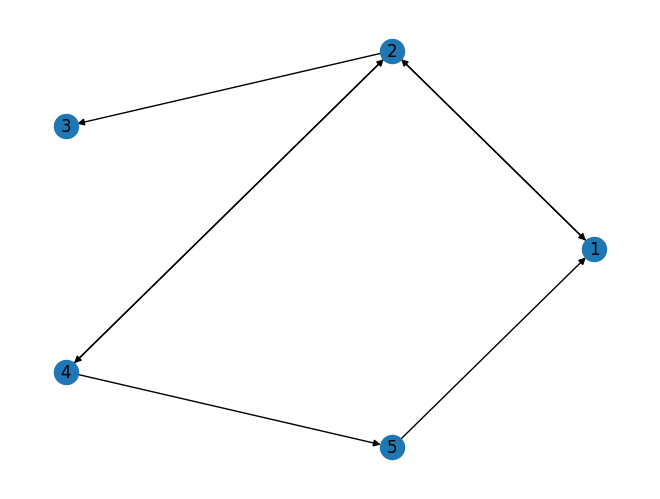

In [414]:
G = nx.DiGraph([
    (1, 2),
    (2, 1),
    (2, 3),
    (2, 4),
    (4, 2),
    (4, 5),
    (5, 1)
])

nx.draw(G=G, with_labels=True, pos=nx.circular_layout(G))
plt.show()

In [415]:
circuits, circuit_count = extract_circuits(G)
print(f"There are {circuit_count} circuits, and they are: ")

for circuit in circuits:
    print(" -> ".join(list(map(str, circuit))))

There are 44 circuits, and they are: 
1 -> 2 -> 1
1 -> 2 -> 1 -> 2 -> 1
1 -> 2 -> 4 -> 2 -> 1
1 -> 2 -> 4 -> 5 -> 1
1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1
1 -> 2 -> 1 -> 2 -> 4 -> 2 -> 1
1 -> 2 -> 1 -> 2 -> 4 -> 5 -> 1
1 -> 2 -> 4 -> 2 -> 1 -> 2 -> 1
1 -> 2 -> 4 -> 2 -> 4 -> 2 -> 1
1 -> 2 -> 4 -> 2 -> 4 -> 5 -> 1
1 -> 2 -> 4 -> 5 -> 1 -> 2 -> 1
2 -> 1 -> 2
2 -> 4 -> 2
2 -> 1 -> 2 -> 1 -> 2
2 -> 1 -> 2 -> 4 -> 2
2 -> 4 -> 2 -> 1 -> 2
2 -> 4 -> 2 -> 4 -> 2
2 -> 4 -> 5 -> 1 -> 2
2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2
2 -> 1 -> 2 -> 1 -> 2 -> 4 -> 2
2 -> 1 -> 2 -> 4 -> 2 -> 1 -> 2
2 -> 1 -> 2 -> 4 -> 2 -> 4 -> 2
2 -> 1 -> 2 -> 4 -> 5 -> 1 -> 2
2 -> 4 -> 2 -> 1 -> 2 -> 1 -> 2
2 -> 4 -> 2 -> 1 -> 2 -> 4 -> 2
2 -> 4 -> 2 -> 4 -> 2 -> 1 -> 2
2 -> 4 -> 2 -> 4 -> 2 -> 4 -> 2
2 -> 4 -> 2 -> 4 -> 5 -> 1 -> 2
2 -> 4 -> 5 -> 1 -> 2 -> 1 -> 2
2 -> 4 -> 5 -> 1 -> 2 -> 4 -> 2
4 -> 2 -> 4
4 -> 2 -> 1 -> 2 -> 4
4 -> 2 -> 4 -> 2 -> 4
4 -> 5 -> 1 -> 2 -> 4
4 -> 2 -> 1 -> 2 -> 1 -> 2 -> 4
4 -> 2 -> 1 -> 2 -> 4 -> 2 -> 4
